In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

%matplotlib inline

plt.style.use('bmh')

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/yudhaislamisulistya/forest_cover_classification/master/cover_data.csv')
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
data['class'].unique()

array([5, 2, 1, 7, 3, 6, 4])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [6]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
columns = data.columns
for i, label in enumerate(columns):
    print(data[label].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


count    581012.000000
mean       2959.365301
std         279.984734
min        1859.000000
25%        2809.000000
50%        2996.000000
75%        3163.000000
max        3858.000000
Name: Elevation, dtype: float64


<Figure size 576x648 with 0 Axes>

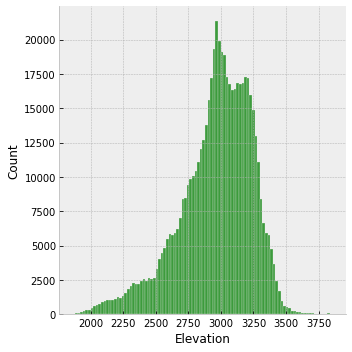

In [8]:
print(data['Elevation'].describe())
# figure
plt.figure(figsize=(8,9))
sns.displot(data['Elevation'], bins=100, color='g')

# Numerical Data Distribution

In [9]:
list(set(data.dtypes.tolist()))

[dtype('int64')]

[X] All of Data type of Integer

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fced955a7d0>,
      dtype=object)

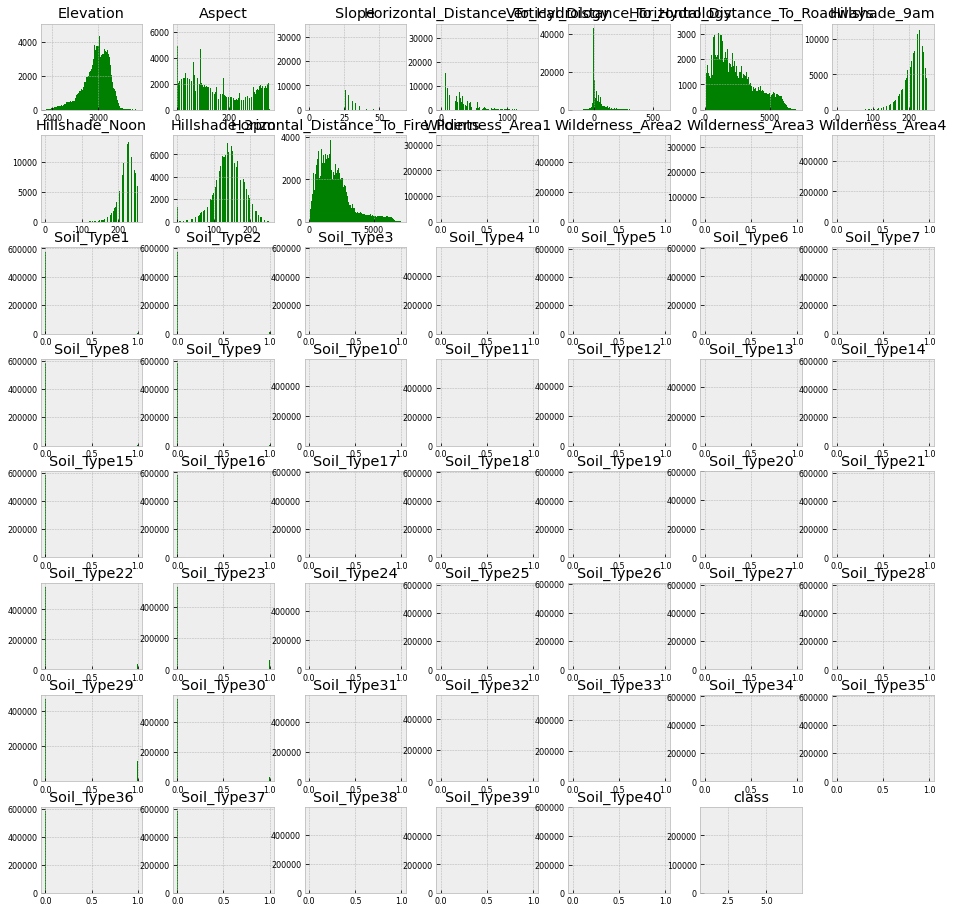

In [10]:
data.hist(bins=500, color='g', figsize=(16,16), xlabelsize=8, ylabelsize=8)

In [11]:
data_corr = data.corr()['Elevation'].sort_values()
abs(data_corr)

Wilderness_Area4                      0.619374
Soil_Type10                           0.428746
class                                 0.269554
Slope                                 0.242697
Soil_Type6                            0.214606
Soil_Type1                            0.204512
Soil_Type2                            0.187677
Soil_Type4                            0.183521
Soil_Type3                            0.182463
Soil_Type5                            0.150376
Soil_Type11                           0.134227
Soil_Type12                           0.118905
Soil_Type17                           0.111028
Soil_Type18                           0.081811
Soil_Type14                           0.080825
Soil_Type9                            0.060915
Soil_Type16                           0.059446
Soil_Type13                           0.043984
Soil_Type20                           0.043128
Soil_Type28                           0.029270
Soil_Type30                           0.026667
Soil_Type26  

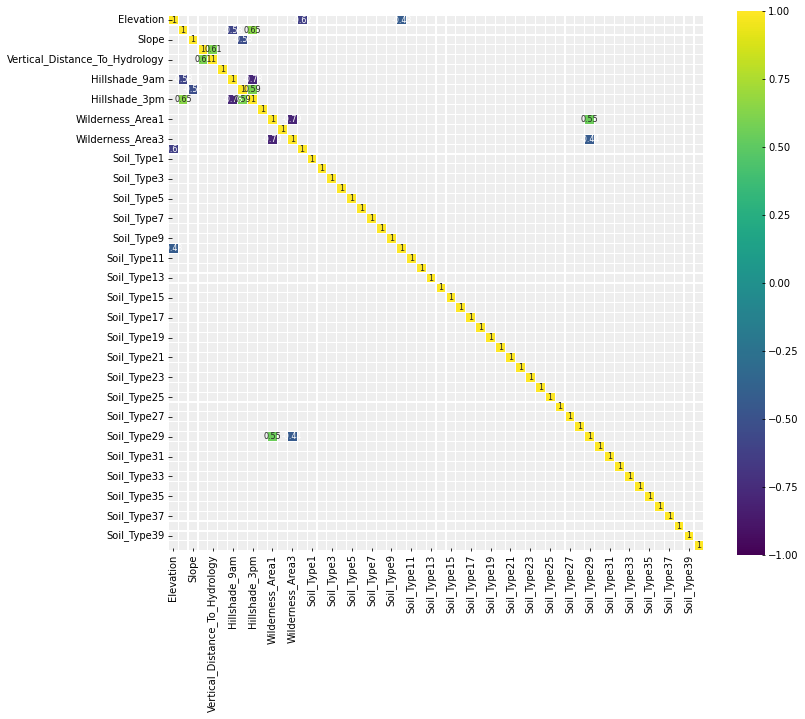

In [12]:
corr = data.drop('class', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [37]:
X = data.drop('class', axis=1)
y = data['class']


In [38]:
y.head()

0    5
1    5
2    2
3    2
4    5
Name: class, dtype: int64

In [41]:
output_class = y.unique()
len(output_class)

7

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=77)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.111112, random_state=77)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(464808, 54)
(58102, 54)
(58102, 54)


In [42]:
model = tf.keras.Sequential()
model.add(layers.Dense(units=54, kernel_initializer='he_uniform', activation='relu', input_dim = 54))
model.add(layers.Dense(units=50, kernel_initializer='he_uniform', activation='relu'))
model.add(layers.Dense(units=35, kernel_initializer='he_uniform', activation='relu'))
model.add(layers.Dense(units=8, activation='softmax'))


In [43]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 54)                2970      
                                                                 
 dense_9 (Dense)             (None, 50)                2750      
                                                                 
 dense_10 (Dense)            (None, 35)                1785      
                                                                 
 dense_11 (Dense)            (None, 8)                 288       
                                                                 
Total params: 7,793
Trainable params: 7,793
Non-trainable params: 0
_________________________________________________________________


In [45]:
print("Fit model on training data")
history = model.fit(
    X_train,
    y_train,
    epochs=35,
    validation_data=(X_val, y_val),
)

Fit model on training data
Epoch 1/35
14526/14526 [==============================] - 28s 2ms/step - loss: 3.4326 - accuracy: 0.5914 - val_loss: 0.7829 - val_accuracy: 0.6652
Epoch 2/35
14526/14526 [==============================] - 27s 2ms/step - loss: 0.7487 - accuracy: 0.6800 - val_loss: 0.6639 - val_accuracy: 0.7191
Epoch 3/35
14526/14526 [==============================] - 28s 2ms/step - loss: 0.6852 - accuracy: 0.7065 - val_loss: 0.6845 - val_accuracy: 0.6978
Epoch 4/35
14526/14526 [==============================] - 28s 2ms/step - loss: 0.6535 - accuracy: 0.7196 - val_loss: 0.6411 - val_accuracy: 0.7299
Epoch 5/35
14526/14526 [==============================] - 28s 2ms/step - loss: 0.6336 - accuracy: 0.7295 - val_loss: 0.6000 - val_accuracy: 0.7440
Epoch 6/35
14526/14526 [==============================] - 27s 2ms/step - loss: 0.6165 - accuracy: 0.7353 - val_loss: 0.5872 - val_accuracy: 0.7474
Epoch 7/35
14526/14526 [==============================] - 27s 2ms/step - loss: 0.6012 - acc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


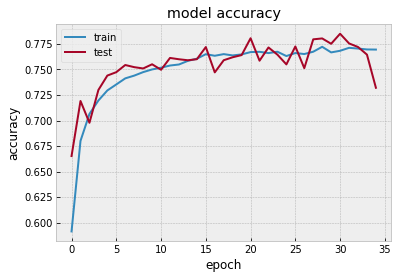

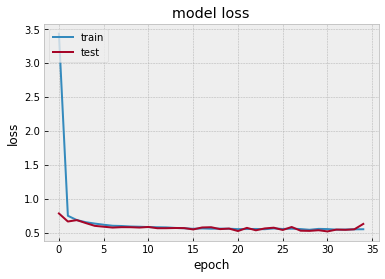

In [47]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss, test acc:", results)

print("Generate predictions for 3 samples")
predictions = model.predict(X_test[:100])
print("predictions shape:", predictions.shape)

Evaluate on test data
454/454 [==============================] - 1s 2ms/step - loss: 0.6299 - accuracy: 0.7283
test loss, test acc: [0.6298534870147705, 0.728270947933197]
Generate predictions for 3 samples
predictions shape: (100, 8)


In [51]:
model.save('coverType_classification')

INFO:tensorflow:Assets written to: coverType_classification/assets


In [52]:
new_model = tf.keras.models.load_model('/content/coverType_classification')

new_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 54)                2970      
                                                                 
 dense_9 (Dense)             (None, 50)                2750      
                                                                 
 dense_10 (Dense)            (None, 35)                1785      
                                                                 
 dense_11 (Dense)            (None, 8)                 288       
                                                                 
Total params: 7,793
Trainable params: 7,793
Non-trainable params: 0
_________________________________________________________________
